# Transmissão COVID

Este projeto tem como foco identificar uma pessoa que está contaminada com COVID e outra pessoa que não está, verificando qual o caminho mais propício para a transmissão do vírus

Vamos importar as bibliotecas que vão nos ajudar a visualizar o grafo e também nos oferecer um conjunto de grafos já construído

In [108]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets

Aqui importamos os dados das relações dos personagens de os Miseráveis, cujo grafo vamos utilizar para simular as relações entre as pessoas

In [2]:
g = nx.generators.social.les_miserables_graph()

Aqui vamos plotar o grafo para identificar as relações de uma forma mais abstrata

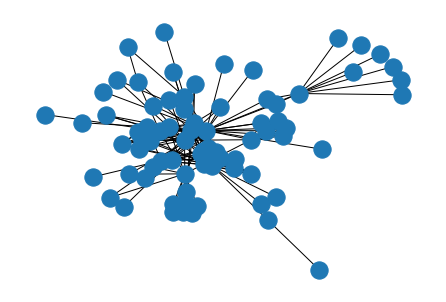

In [3]:
nx.draw(g)
plt.show()

O objeto grafo que temos está em uma classe Graph, do próprio NetworkX, porém para manipulá-lo e utilizar um estrutura de dados que não simplifique muito, vamos converte para um dicionário em Python, que vai servir para simular uma lista de adjacência.

In [4]:
G_dict = nx.convert.to_dict_of_dicts(g)

Aqui vamos ver qual o formato da estrutura de dados e como os dados estão distribuídos no grafo.

In [5]:
for k,v in G_dict.items():
    print(k,v)

Napoleon {'Myriel': {'weight': 1}}
Myriel {'Napoleon': {'weight': 1}, 'MlleBaptistine': {'weight': 8}, 'MmeMagloire': {'weight': 10}, 'CountessDeLo': {'weight': 1}, 'Geborand': {'weight': 1}, 'Champtercier': {'weight': 1}, 'Cravatte': {'weight': 1}, 'Count': {'weight': 2}, 'OldMan': {'weight': 1}, 'Valjean': {'weight': 5}}
MlleBaptistine {'Myriel': {'weight': 8}, 'MmeMagloire': {'weight': 6}, 'Valjean': {'weight': 3}}
MmeMagloire {'Myriel': {'weight': 10}, 'MlleBaptistine': {'weight': 6}, 'Valjean': {'weight': 3}}
CountessDeLo {'Myriel': {'weight': 1}}
Geborand {'Myriel': {'weight': 1}}
Champtercier {'Myriel': {'weight': 1}}
Cravatte {'Myriel': {'weight': 1}}
Count {'Myriel': {'weight': 2}}
OldMan {'Myriel': {'weight': 1}}
Valjean {'Labarre': {'weight': 1}, 'MmeMagloire': {'weight': 3}, 'MlleBaptistine': {'weight': 3}, 'Myriel': {'weight': 5}, 'Marguerite': {'weight': 1}, 'MmeDeR': {'weight': 1}, 'Isabeau': {'weight': 1}, 'Gervais': {'weight': 1}, 'Fantine': {'weight': 9}, 'MmeThenardi

A primeira coisa que temos que pensar é que o peso da relações é grande quando a relação é forte, porém se pensarmos no algoritmo de Djikstra, ele busca o caminho de menor peso, por isso é essencial que inverta-se os pesos das relações, por exemplo:

- Myriel -> MlleBaptistine: {'weight': 8}

Precisamos que este peso se inverta, porém vamos ver quais são os intervalos destes valores para assim poder fazer a inversão.

In [6]:
maior_peso = 0
menor_peso = 1

for fonte, conexoes in G_dict.items():
    for nome, weight in conexoes.items():
        if weight['weight'] > maior_peso:
            maior_peso = weight['weight']
        
print(maior_peso)

31


Identificamos o maior peso de todas as arestas para poder fazer a alteração já relatada anteriormente.

Não foi necessário utilizar um método para identificar o menor peso, visto que quando o peso é '0', não há relação, e por também não termos nenhum peso negativo. Logo, o menor peso será 1.

Antes de inverter, vamos verificar como estão os primeiros pesos para poder comparar após rodar o código e ver se tivemos sucesso.

In [7]:
for fonte, conexoes in G_dict.items():
    print(fonte, '-> Essa é a fonte.')
    for nome, weight in v.items():
        print(nome, weight['weight'])

Napoleon -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
Myriel -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
MlleBaptistine -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
MmeMagloire -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
CountessDeLo -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
Geborand -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
Champtercier -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
Cravatte -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
Count -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
OldMan -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courf

Para o próximo passo, vamos fazer a inversão proporcional que se dará por uma subtração do peso máximo.

In [8]:
for fonte, conexoes in G_dict.items():
    for nome, peso in conexoes.items():
        peso['peso'] = maior_peso - peso['weight'] + 1

Após a inversão, precisamos verificar o sucesso do que fizemos. 

In [9]:
for fonte, conexoes in G_dict.items():
    print(fonte, '-> Essa é a fonte.')
    for nome, peso in v.items():
        print(nome, peso['peso'])

Napoleon -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
Myriel -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
MlleBaptistine -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
MmeMagloire -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
CountessDeLo -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
Geborand -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
Champtercier -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
Cravatte -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
Count -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
OldMan 

Certo! Após a verificação, conseguimos confirmar que tivemos sucesso ao fazer a inversão dos pesos. 

Agora vamos criar um dicionário com os nomes dos personagens para termos acesso a eles quando formos utilizar o algoritmo de Dijkstra a partir de uma matriz de adjacências, pois ela é indexada apenas por números.

In [10]:
dic_nome = {}

for indice, fonte in enumerate(G_dict.keys()):
    dic_nome[indice] = fonte

print(dic_nome)

{0: 'Napoleon', 1: 'Myriel', 2: 'MlleBaptistine', 3: 'MmeMagloire', 4: 'CountessDeLo', 5: 'Geborand', 6: 'Champtercier', 7: 'Cravatte', 8: 'Count', 9: 'OldMan', 10: 'Valjean', 11: 'Labarre', 12: 'Marguerite', 13: 'MmeDeR', 14: 'Isabeau', 15: 'Gervais', 16: 'Listolier', 17: 'Tholomyes', 18: 'Fameuil', 19: 'Blacheville', 20: 'Favourite', 21: 'Dahlia', 22: 'Zephine', 23: 'Fantine', 24: 'MmeThenardier', 25: 'Thenardier', 26: 'Cosette', 27: 'Javert', 28: 'Fauchelevent', 29: 'Bamatabois', 30: 'Perpetue', 31: 'Simplice', 32: 'Scaufflaire', 33: 'Woman1', 34: 'Judge', 35: 'Champmathieu', 36: 'Brevet', 37: 'Chenildieu', 38: 'Cochepaille', 39: 'Pontmercy', 40: 'Boulatruelle', 41: 'Eponine', 42: 'Anzelma', 43: 'Woman2', 44: 'MotherInnocent', 45: 'Gribier', 46: 'MmeBurgon', 47: 'Jondrette', 48: 'Gavroche', 49: 'Gillenormand', 50: 'Magnon', 51: 'MlleGillenormand', 52: 'MmePontmercy', 53: 'MlleVaubois', 54: 'LtGillenormand', 55: 'Marius', 56: 'BaronessT', 57: 'Mabeuf', 58: 'Enjolras', 59: 'Combeferre

Agora, o próximo passo é utilizar o algoritmo de Dijkstra pra encontrar o menor caminho entre uma fonte e um destino.

In [99]:
def minDistance(dist,queue):

    minimum = float("Inf")
    min_index = -1

    for i in range(len(dist)):
        if dist[i] < minimum and i in queue:
            minimum = dist[i]
            min_index = i
    return min_index

In [100]:
def listaCaminho(parent, j):
    caminho = []
    while(j!=-1):
        caminho.append(dic_nome[j])
        j = parent[j]
        
    caminho.reverse()
    return caminho

In [101]:
def callback_caminho(dist, parent, src, dstny):

    h = 0
    for i in range(1, len(dist)):
        

        if i == dstny:
            h = 1
            return (listaCaminho(parent,i),dist[i])
    
    if h == 0:
        return -1,-1

In [102]:
def dijkstra(graph, src, dstny):

    row = len(graph)
    col = len(graph[0])

    dist = [float("Inf")] * row
    parent = [-1] * row
    dist[src] = 0
    queue = []

    for i in range(row):
        queue.append(i)

    while queue:

        u = minDistance(dist,queue)
        queue.remove(u)

        for i in range(col):
            if graph[u][i] and i in queue:
                if dist[u] + graph[u][i] < dist[i]:
                    dist[i] = dist[u] + graph[u][i]
                    parent[i] = u

    return callback_caminho(dist,parent, src, dstny)

Certo!

Com o algoritmo implementado, faremos a transformação do dicionário para a matriz de adjacências.

In [96]:
g_m = nx.adjacency_matrix(nx.Graph(G_dict)).todense().tolist()

Feito isso, agora nós podemos aplicar o algoritmo de Dijkstra a fim de utilizar dois personagens (um de fonte e outro de destino) para encontrar o menor caminho — em relação aos pesos das arestas), simbolizando a relação dos personagens. 

A função a seguir tem 3 parâmetros:

- g_m: este é o nosso grafo (representado por uma matriz de adjacências) que vai conter os pesos das arestas e nós que utilizaremos.

- fonte: aqui utilizamos um número que corresponderá a algum personagem do 'Les Miserables'. Vai servir como fonte e ponto inicial da nossa busca. No exemplo abaixo, está representado pelo número '15'.

- destino: aqui utilizamos um número que corresponderá a algum personagem do 'Les Miserables'. Vai servir como destino e ponto final da nossa busca.  No exemplo abaixo, está representado pelo número '55'.

In [107]:
caminho,peso = dijkstra(g_m, 0, 55)

print(f'Peso do caminho: {peso}')
print(f'Caminho:',' -> '.join(caminho))

Peso do caminho: 9
Caminho: Napoleon -> Myriel -> Valjean -> Gavroche -> Mabeuf -> Marius


## Parte interativa

Agora vamos organizar um menu de seleção para verificar uma pessoa contaminada e o caminho mais provável para que outra pessoa seja contaminada por esta pessoa contaminada

In [133]:
def invert_dic(d):
    return list({v: k for k, v in d.items()}.items())

In [134]:
contaminada = widgets.Dropdown(
    options=invert_dic(dic_nome),
    value=0,
    description='Contaminada:',
)

In [135]:
destino = widgets.Dropdown(
    options=invert_dic(dic_nome),
    value=0,
    description='Destino:',
)

In [137]:
display(contaminada)
display(destino)

Dropdown(description='Contaminada:', options=(('Napoleon', 0), ('Myriel', 1), ('MlleBaptistine', 2), ('MmeMagl…

Dropdown(description='Destino:', options=(('Napoleon', 0), ('Myriel', 1), ('MlleBaptistine', 2), ('MmeMagloire…

In [140]:
caminho,peso = dijkstra(g_m, contaminada.value, destino.value)

if caminho!=-1 and peso!=-1:
    print(f'Peso do caminho: {peso}')
    print(f'Caminho:',' -> '.join(caminho))
else:
    print('Não há conexão')

Peso do caminho: 3
Caminho: Count -> Myriel -> CountessDeLo
